<h2>Комп'ютерний практикум з обробки біомедичних даних</h2>
<h3>за темою: парний t-критерій Стьюдента </h3>
<h3>студентки групи БС-81</h3>
<h3>Кисельової Ірини</h3>

# Завдання

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище. Формат даних:

| Група 1 | Група 2  | 
| ------------- |--------- |
| $k_{1}  $   | $k_{2}$   |
| $...$   | $...$   |
| $k_{1n}$   | $k_{2n}$   |

2. Побудувати графік, що відображає розкид даних в групах. Приклад:
![alt text](https://s3.amazonaws.com/libapps/accounts/2515/images/spss_paired-t_example_boxplot.PNG)

3. Написати функції:
* для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

* для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant). 

4. Перевірити розбіжність на між групами на даних з п. 1. 

5. Сформувати висновок про взаємозв'язок між групами та про їх розбіжність. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint

In [27]:
#random little change of data after the test
def change(data):
    median = int(np.median(data))
    return [(x + randint(1,3)) for x in data]

first = np.random.normal(loc=15, scale=2, size=100)
df = pd.DataFrame({
    'First test': first,
    'Second test' : change(first)
    })
df

,First test,Second test
0,20.017205,21.017205
1,15.149844,18.149844
2,12.804592,15.804592
3,15.127119,18.127119
4,13.090213,16.090213
...,...,...
95,13.758899,15.758899
96,13.830546,15.830546
97,15.547786,18.547786
98,14.819677,15.819677


Побудувати графік, що відображає розкид даних в групах. 

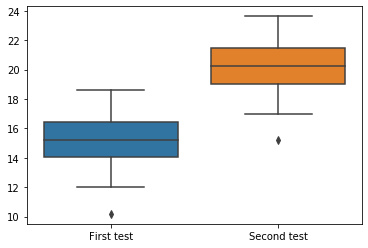

In [7]:
sns.boxplot(data=df)

Написати функції:

для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

Перед визначенням відмінності за парним критерієм Стьюента необхідно перевірити чи є зв'язок між групами.
Для цього використовують коефіцієнт кореляції Пірсона. Його розраховують за формулою:
$$ r = \frac{n\cdot \sum(x_i\cdot y_i) - (\sum x_i \cdot \sum y_i)}{\sqrt{(n\cdot \sum x_i^2 - (\sum x_i) ^2) \cdot (n\cdot \sum y_i^2 - (\sum y_i) ^2)}} $$

In [44]:
def findR(x, y, n):
    chisl = (n * (x*y).sum() - x.sum()*y.sum())
    znam = (n*(x**2).sum() - (x.sum())**2) * (n*(y**2).sum() - (y.sum())**2)
    return chisl/np.sqrt(znam)

def get_coefficients(file_name, index):
    coefficients = pd.read_excel(file_name, index=False)
    coefficients.set_index(index, inplace=True)
    return coefficients

def get_coefficient(p_coefficients, df):
    if df in p_coefficients.index:
        return p_coefficients.loc[df, 0.05]
    d = min(p_coefficients.index[:-1], key=lambda x:abs(int(x)-df))
    print(d, "nearest index in the table")
    return p_coefficients.loc[d, 0.05]

# x, y - first and second group
def pearson(x, y):
    n = len(x)
    r = pearson_formula(x, y, n)
    df = n-2
    #get indexes in column "df"
    p_coefficients = get_coefficients('corelCriteria.xlsx', "df")
    #search the nearest value between the indexes(1...100) and get the value
    cmp_value = get_coefficient(p_coefficients, df)
    print(cmp_value, " compare with value")
    significance = "significant" if abs(r) > cmp_value else "not significant"
    return r, df, significance
        
pearson(df["First test"], df["Second test"])

100 nearest index in the table
0.1946  compare with value


(0.9370567223555161, 98, 'significant')

Написати функцію для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [57]:
def equal(v, cmp_value):
    if abs(v) > cmp_value:
        return "not significant"
    return "significant" 

def findT(x, y):
    d = x - y
    
    n = len(x)

    return n-1,  (d.mean() / d.std()) * np.sqrt(n)
    
def Student(x, y):
    df, t = findT(x, y)
    
    s_coefficients = get_coefficients('pairedCriteria.xlsx', "df")
    cm_value = get_coefficient(s_coefficients, df)
    
    return t, df, equal(t, cm_value)
    
Student(df["First test"], df["Second test"])

100 nearest index in the table


(-26.28595448221786, 99, 'not significant')

<h2>Висновок</h2
    
1) З порівняння за критерієм Пірсона, можна зробити висновок, що звязок у групах дуже високий(r = 0.937).

2) З порівняння за критерієм Стьюдента, можна зробити висновок, що приймається альтернативна гіпотеза про відмінність в середніх значеннях двох груп